In [1]:
import osmnx as ox, networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import functools
import community

from scipy import sparse
from scipy.sparse import linalg
import time
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, mapping

from math import sqrt
import pandas as pd
from shapely.ops import cascaded_union
pd.set_option('precision', 10)

In [2]:
import math
import geoplot as gplt

In [3]:
import image_city_functions as ic

In [4]:
#initialise path, names, etc.

city_name = 'London'
folder_ouptut ='Outputs/'+city_name+'/'
epsg = 27700
crs = {'init': 'epsg:27700', 'no_defs': True}

In [5]:
# try reading nodes, paths, landmarks and sight_lines
# At this point, every element has already been extracted

nodes = gpd.read_file(folder_ouptut+city_name+'_nodes.shp', driver='ESRI Shapefile')
paths = gpd.read_file(folder_ouptut+city_name+'_paths.shp', driver='ESRI Shapefile')
landmarks = gpd.read_file(folder_ouptut+city_name+'_landmarks.shp', driver='ESRI Shapefile')
sight_lines = gpd.read_file(folder_ouptut+city_name+'_sight_lines.shp', driver='ESRI Shapefile')

In [6]:
czone = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/London/Congestion_area_polygon/Polygon_proj.shp', 
                      driver='ESRI Shapefile')

In [21]:
pedestrians = pd.read_csv("C:/Users/g_filo01/sciebo/GIS Data/London_pedestrian_counts_12-06.csv")

In [22]:
paths_data = pd.merge(paths, pedestrians, left_on="streetID", right_on="streetID", how='left')

In [24]:
paths_data.to_file(folder_ouptut+city_name+'_pedestrians_count.shp', driver='ESRI Shapefile')

In [ ]:
paths_data.dtypes

In [ ]:
cmap = cm.get_cmap('Greys_r')
cmap(100)

In [ ]:
paths_data['euclideanDiff'] = paths_data['euclidean']-paths_data['euclideanLand']

In [11]:
import pysal as ps

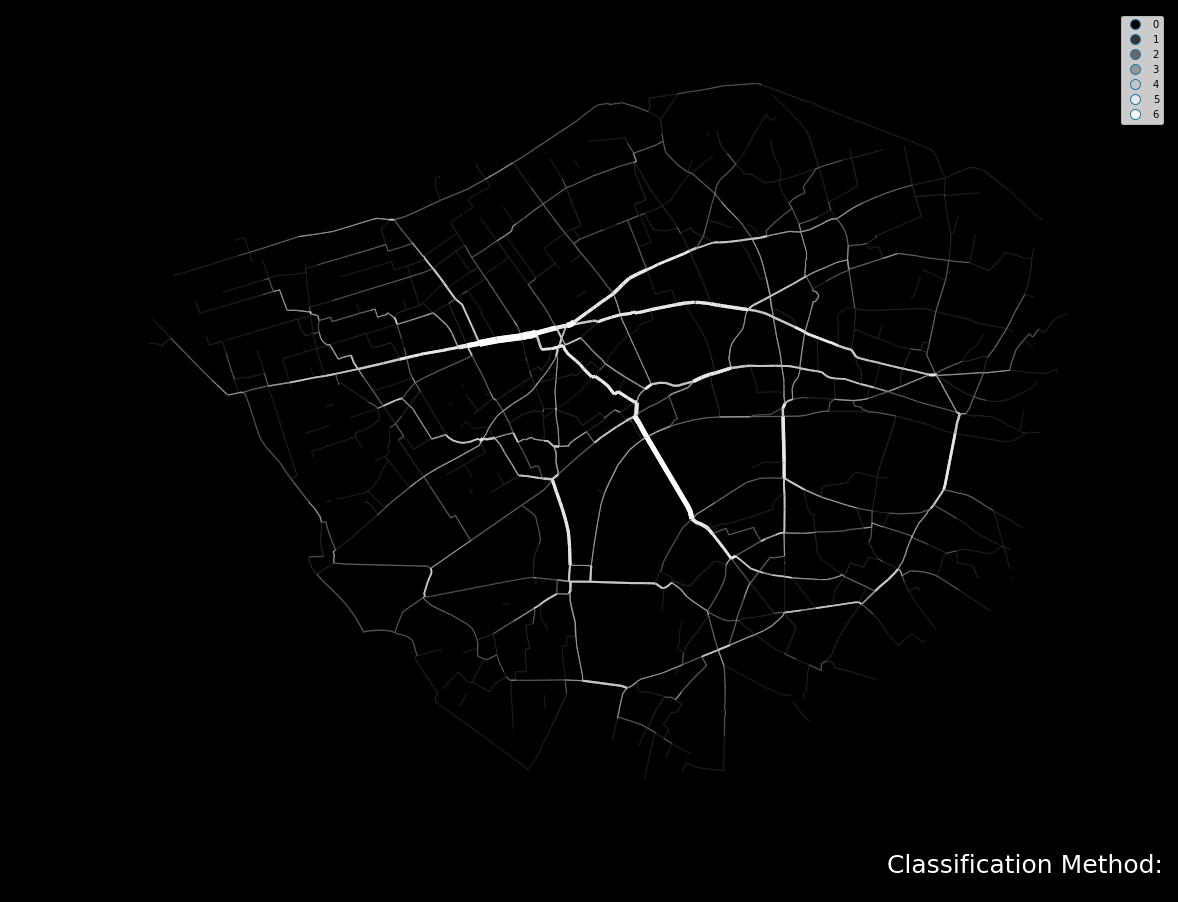

In [18]:
def plot_grad_GDF(gdf, column, title, black_back, cmap = 'Greys_r', save = False, directory = None):
    
#     cmap = cm.get_cmap('Greys_r', 7) 

    f, ax = plt.subplots(figsize=(20, 20)) 

    cl = ps.Fisher_Jenks(gdf[column], 7)
    tmp = gdf.assign(cl = cl.yb)
    cmap = cm.get_cmap('Greys_r', len(cl.bins)) 
    
#     bins = [50, 100, 200, 400, 800, 1600, 3200, 5000]
#     cl = ps.User_Defined(gdf[column], bins)
#     cmap = cm.get_cmap('Greys_r', len(cl.bins))
    tmp = gdf.assign(cl = cl.yb)
    
    linewidth = gdf[column]*3/1000
    gdf.assign(cl=cl.yb).plot(ax=ax, column='cl', categorical=True, k=8, cmap=cmap, 
                              linewidth=linewidth, legend=True)
    
    for i in range(0, len(cl.bins)):
        tmp_p = tmp[tmp.cl == i]
        linewidth = tmp_p[column]*3/1000
        linewidth = [1.6 if x < 1 else x for x in linewidth]
        
        if i == len(cl.bins): alpha = 1
        else: alpha = i/10+0.20

        tmp_p.plot(ax=ax, color = cmap(i), categorical=True, 
                   linewidth = linewidth, legend=False, alpha = alpha)
        
   
    smallprint = ax.text(
    .995, 0,
    'Classification Method:',
    ha='right', va='bottom',
    size=25,
    color='white',
    transform=ax.transAxes)
    
    

#     f.suptitle(title)

    ax.set_axis_off() 
    plt.axis('scaled')
    if black_back == True: plt.rcParams['figure.facecolor'] = 'black'
    else: plt.rcParams['figure.facecolor'] = 'white'     
        
    plt.rcParams['figure.facecolor'] = 'black'
#     leg = ax.get_legend()

# #     leg.set_title(title)
#     leg.get_title().set_fontsize(30)
#     leg.get_title().set_color('white')
#     plt.setp(ax.get_legend().get_texts(), fontsize=20, color = 'white')
    
#     leg.set_frame_on(True)
#     frame = leg.get_frame()
#     frame.set_facecolor('black')
# #     frame.set_alpha(0.9)
#     leg.set_bbox_to_anchor((1.20, 0.65))
#     leg.get_frame().set_linewidth(0.0)
    
#     for l in leg.get_lines():
#         l._legmarker.set_marker('_')
#         l._legmarker.set_markersize(20)
#         l._legmarker.set_linestyle('-')
#         l._legmarker.set_markeredgewidth(6)
#         l._legmarker.set_markeredgecolor(l.get_markerfacecolor())
    
#     leg.handletextpad = 1.5
#     if save == True: f.savefig(directory+title+'.png', format='png',  dpi=500) 
#     return(plt)
    plt.show()
#     plt.savefig(directory+title+'.png', format='png',  dpi=500)    

el = plot_grad_GDF(paths_data,"euclidean","euclideanLand", black_back = True, save = True)

In [ ]:
paths_data.head()

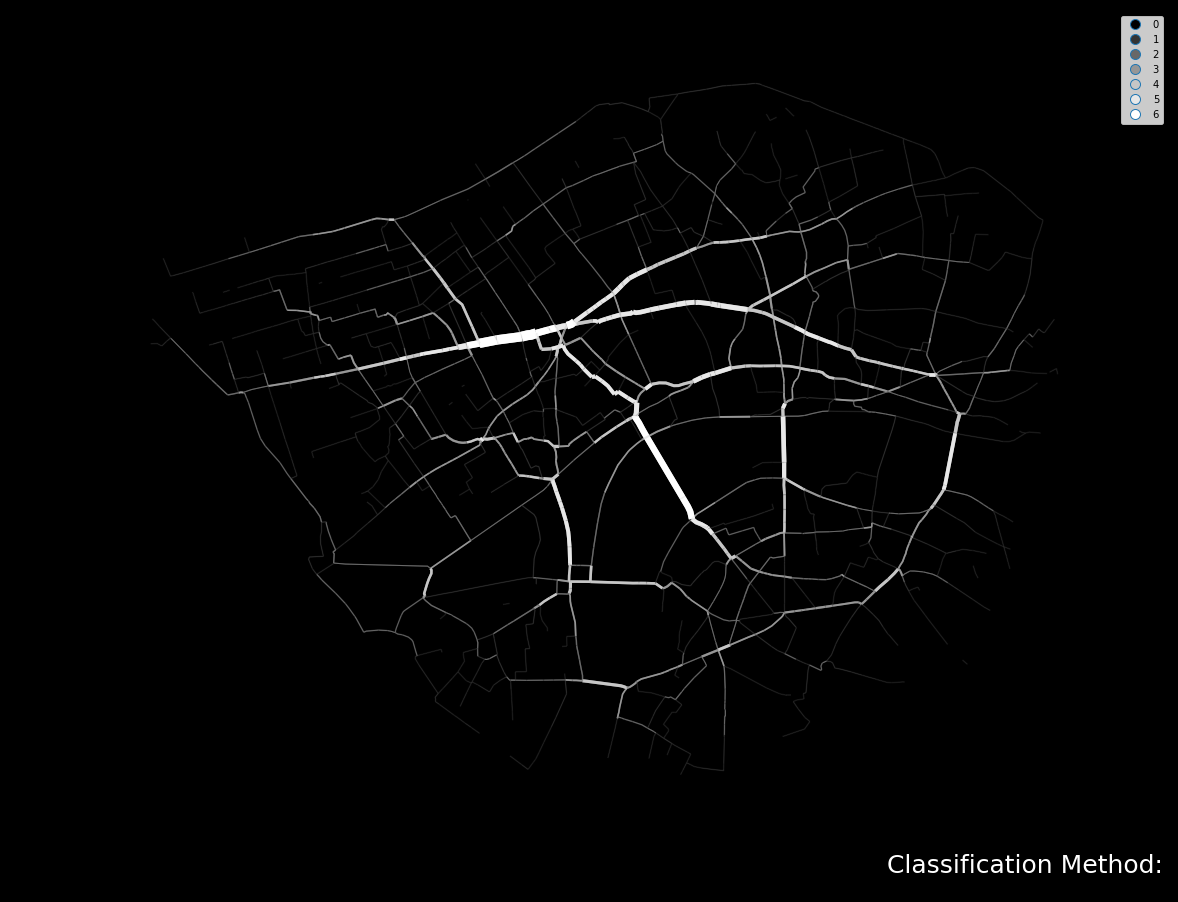

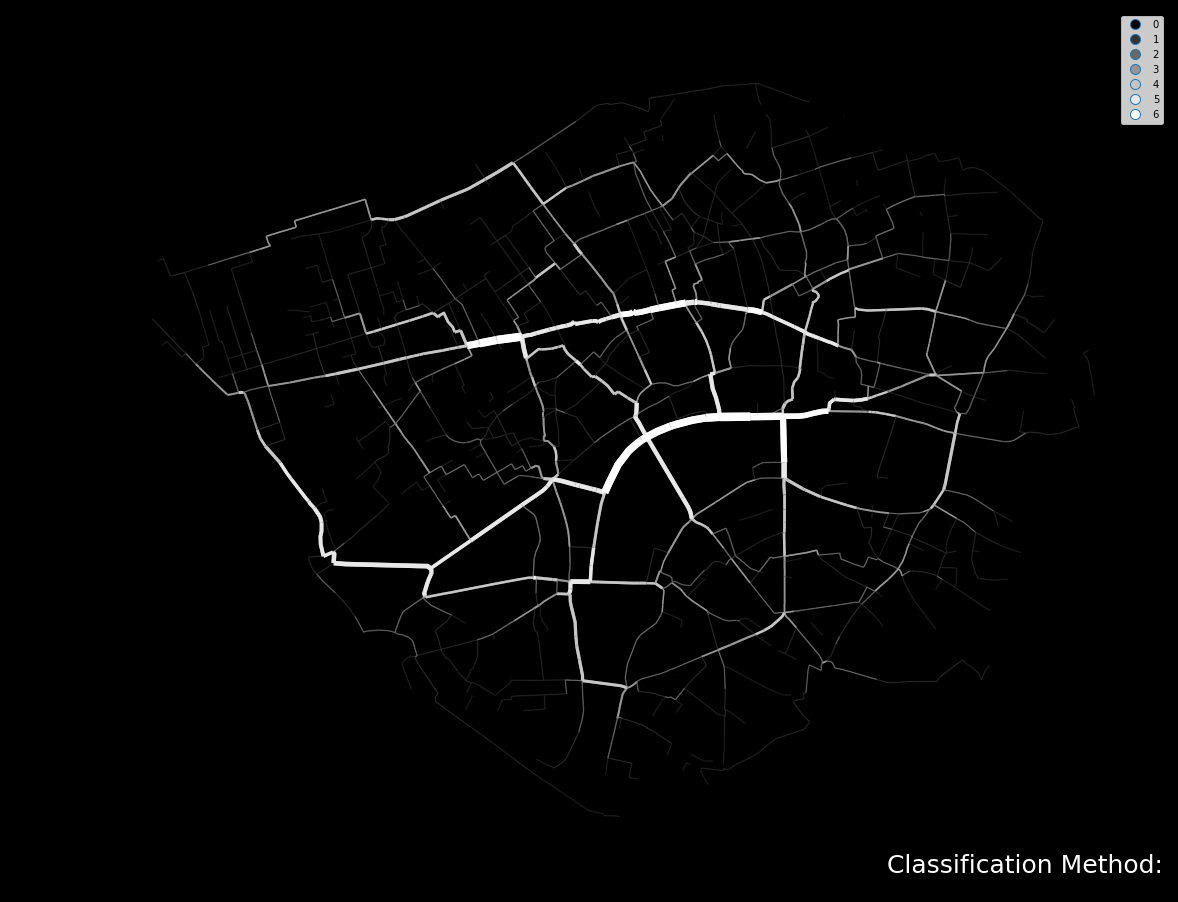

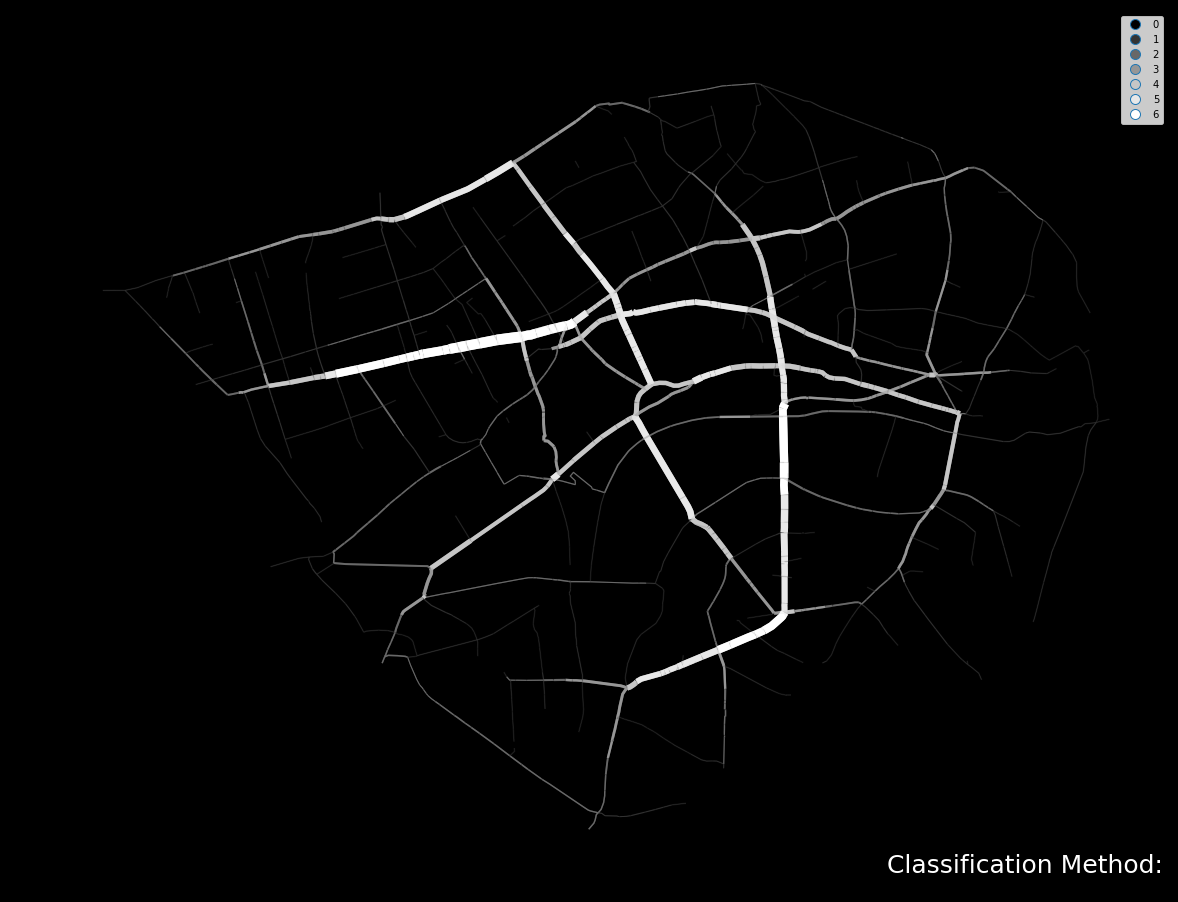

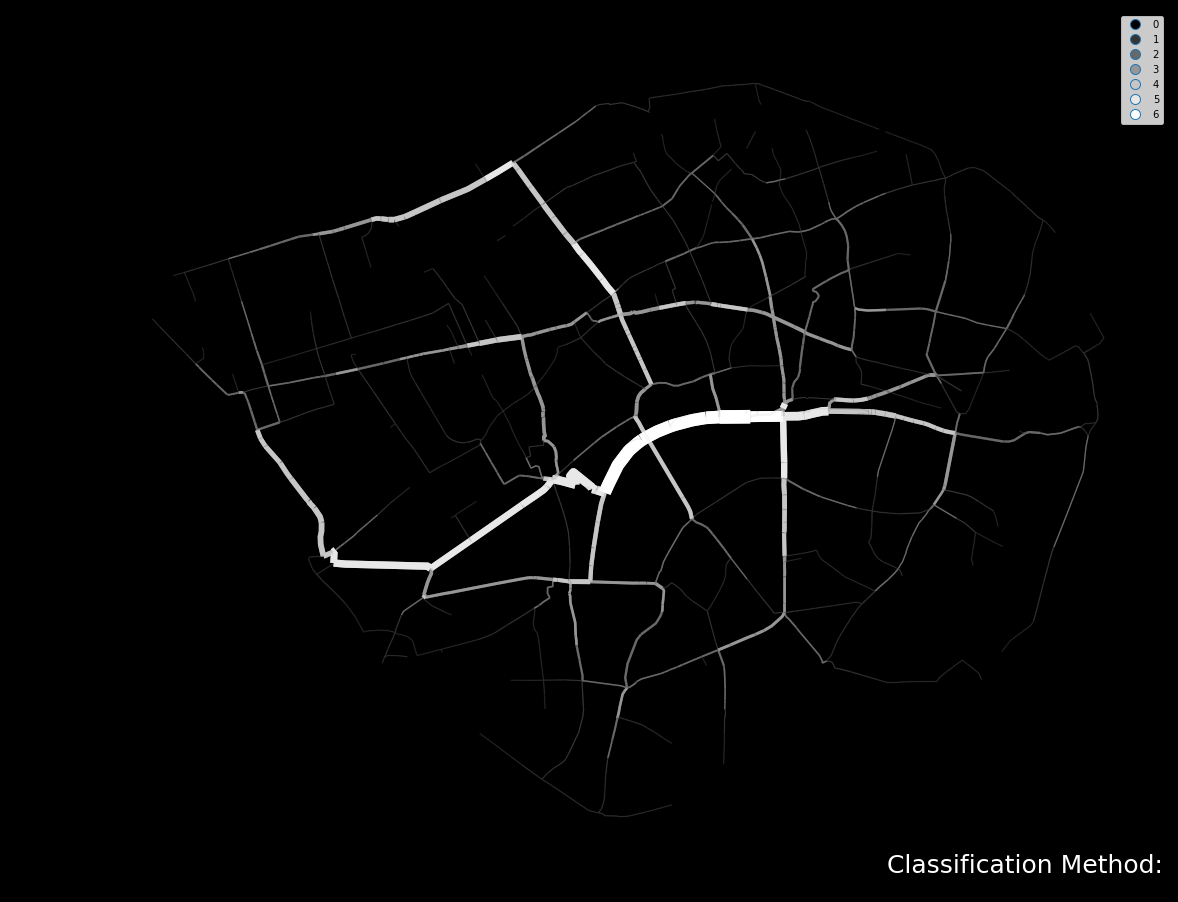

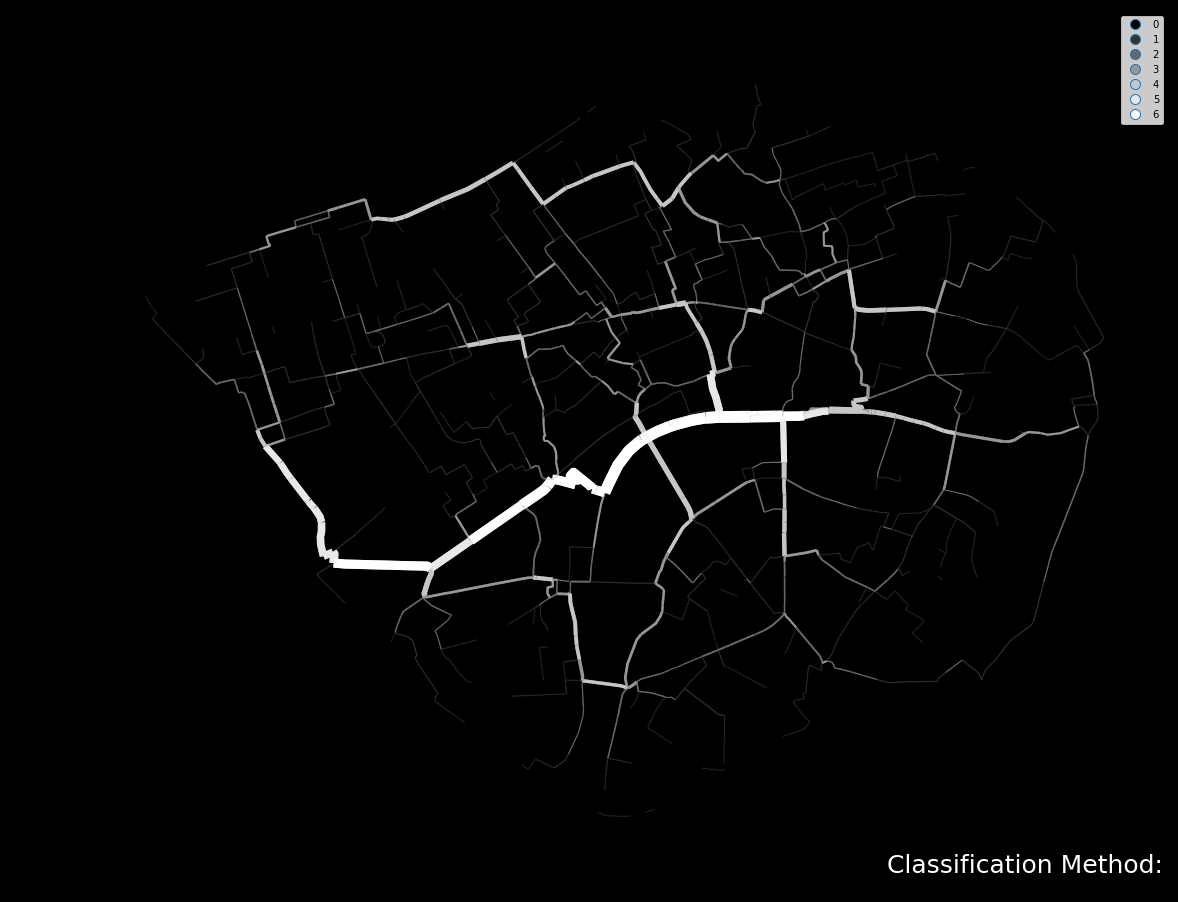

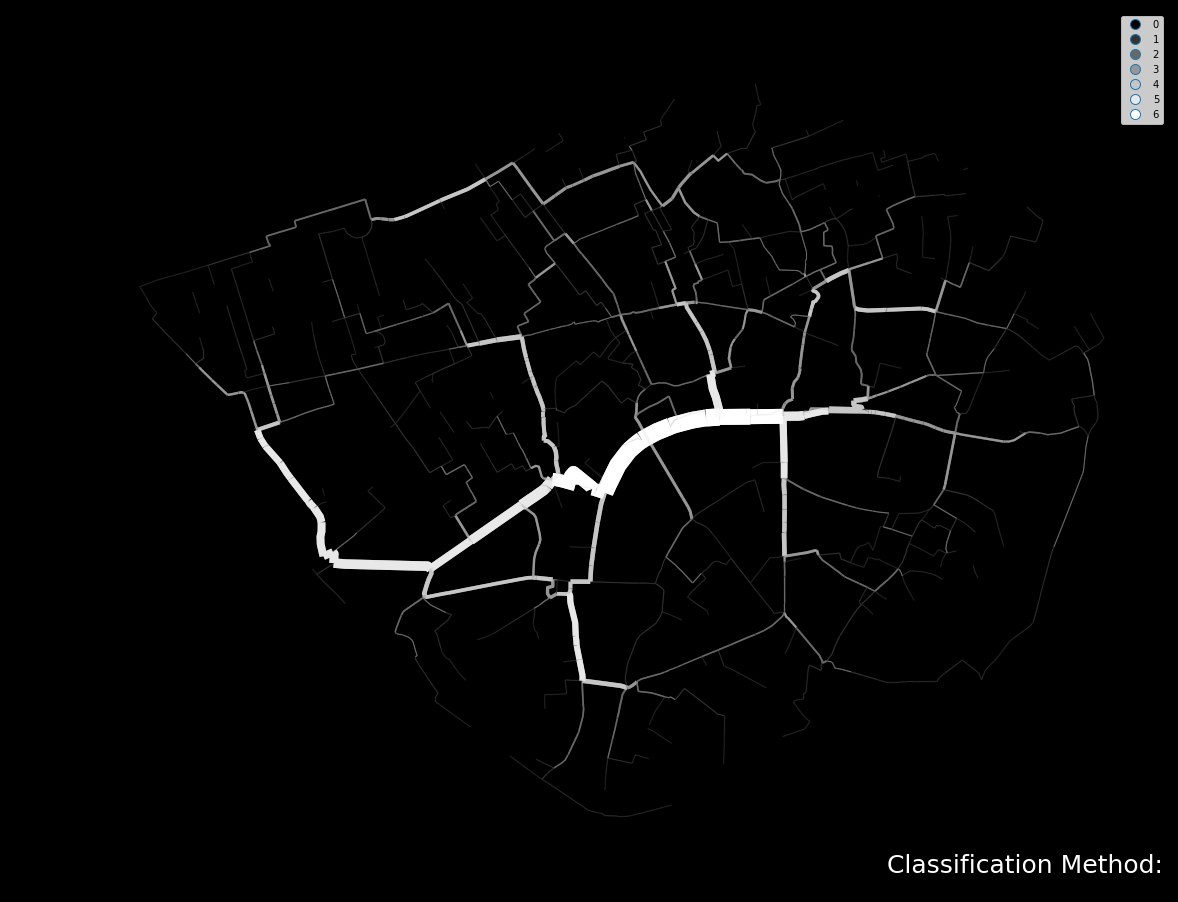

ValueError: Fewer unique values than specified classes.

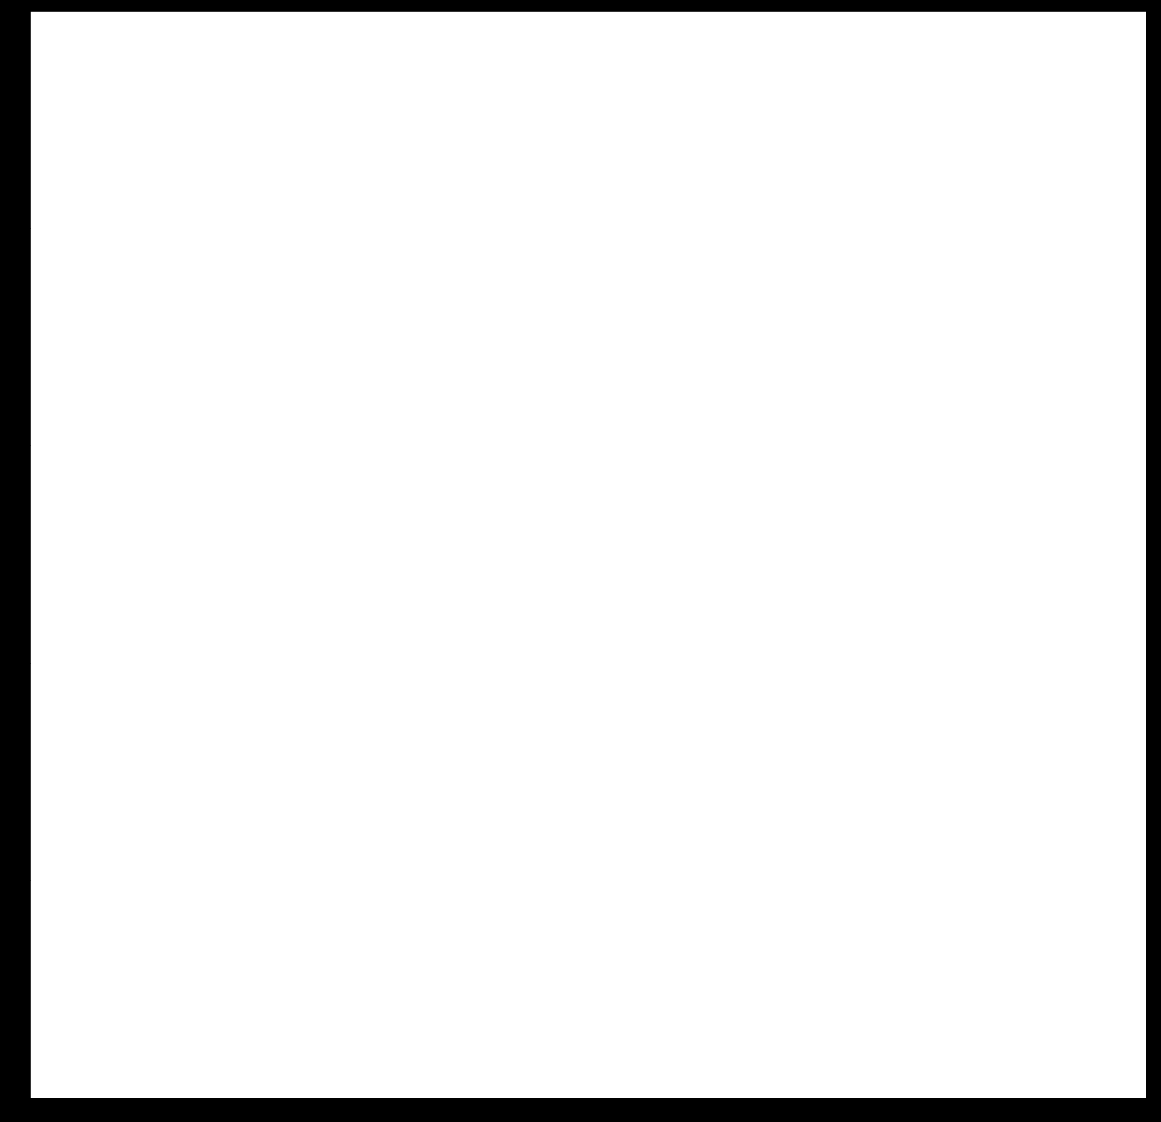

In [23]:
directory ='C:/Users/g_filo01/sciebo/Presentations/Agile/'

plot_grad_GDF(paths_data,"euclidean","euclidean", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"euclideanLand","euclideanLand", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"angular","angular", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"angularLand","angularLand", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"topological","topological", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"topologicalLand","topologicalLand", black_back = True, save = True, directory = directory)
plot_grad_GDF(paths_data,"landmark","topologicalLand", black_back = True, save = True, directory = directory)

In [ ]:
x = 5710464.32
y = 699978.99

In [ ]:
import folium

gjson = paths_data.to_crs(epsg='4326').to_json()

In [ ]:
m = folium.Map(location=[51.30, 0.7], zoom_start=7, tiles="cartodbpositron")

m.choropleth(
    geo_data=paths_data,
    data=paths_data,
    columns=['euclidean'],
    key_on='feature.properties.pfaf_7',
    legend_name='Area (sq mi)', 
    fill_color='YlGn',
    fill_opacity=0.4,
    highlight=True)

m

In [ ]:
ic.plot_grad_GDF(paths_data,"angular","euclidean", black_back = True)

In [ ]:
ic.plot_grad_GDF(paths_data,"angularLand","euclideanLand", black_back = True)

In [ ]:
ic.plot_grad_GDF(paths_data,"euclideanDiff","diff", cmap = 'bwr', black_back = False)

In [ ]:
nodes[(nodes.x > 530369)  & (nodes.x < 530370) ]